# Lab 3

## Before Lab
- Create 3 subdatasets
- Save the 3 datasets
- Method: standard correlation coefficient (Pearson’s r)
- Other feature selection algorithms? (optional)
- Scikit-Learn: Principal Component Analysis (optional)
- Test the reduced datasets with a classifier from Scikit-Learn. Record the accuracies

## During Lab
- Discuss solutions and which worked best
- Make conclusions (Important for good insight here to get 2 marks)
- Marked on code and summary quality

## Notes
- Correlation can be used with ordinal data however is not as useful with nominal data. For nominal data classification accuracy will need to be used.
- Some of the chosen features based on correlation with G3 correlate with each other. School, Address and reason_reputation. 
- Maybe should combine Medu and Fedu into MostParentEdu, LeastParentEdu or AvgParentEdu. Can combine Walc and Dalc into avg or highest/lowest value and compare correlations.
- LinearRegression works better than KNearestNeighbors. Can discuss different models. So far full features works best (only 33 with many binary)

# Imports 

In [49]:
# conda env create -f env.yaml 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [75]:
df = pd.read_csv("Data/processed_data.csv")

# Statistical Summary and Correlation

In [51]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.260536,0.433908,16.726054,0.272989,0.706897,0.884100,2.603448,2.387931,1.522989,1.970307,...,0.124521,0.039272,0.559387,0.279693,0.062261,0.247126,0.103448,0.237548,0.697318,0.069923
std,0.439138,0.495850,1.239975,0.445708,0.455404,0.320259,1.124907,1.099938,0.731727,0.834353,...,0.330333,0.194335,0.496699,0.449064,0.241744,0.431548,0.304689,0.425785,0.459639,0.255140
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,0.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


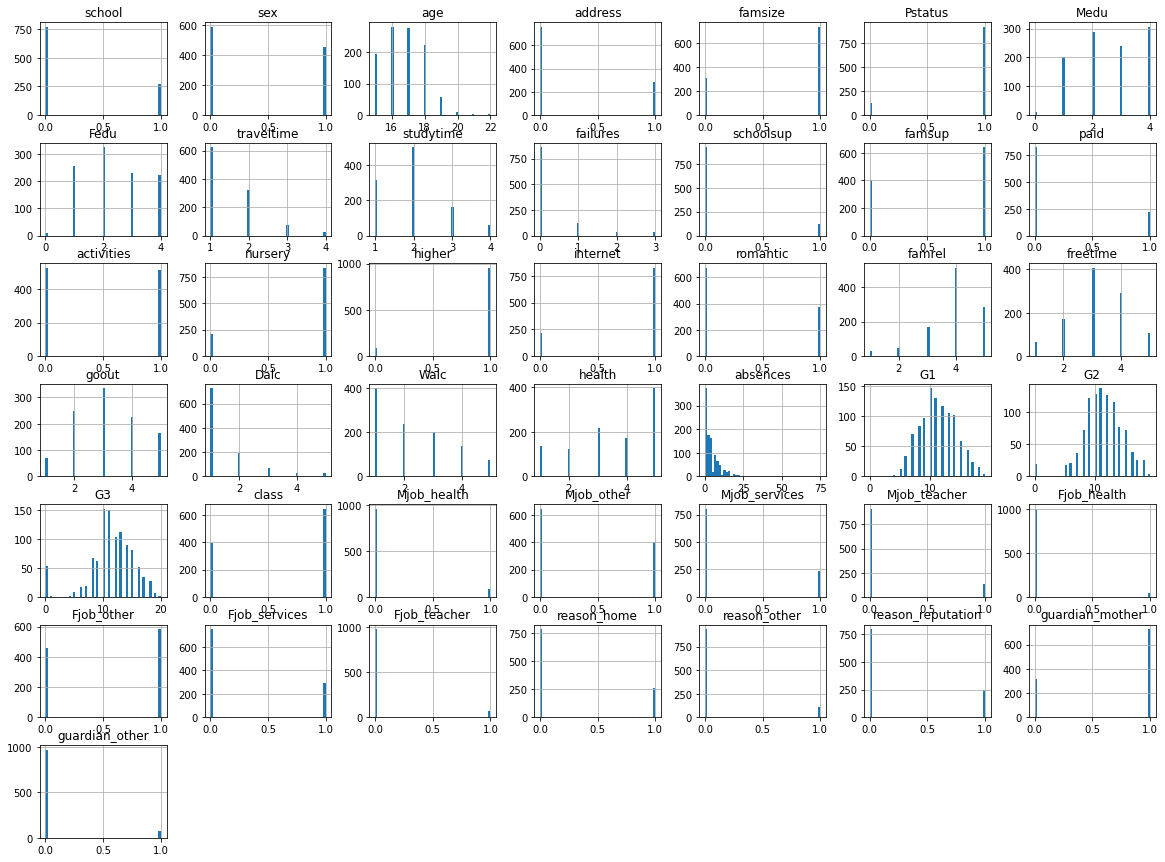

In [52]:
df.hist(bins=50, figsize=(20,15))
plt.show()

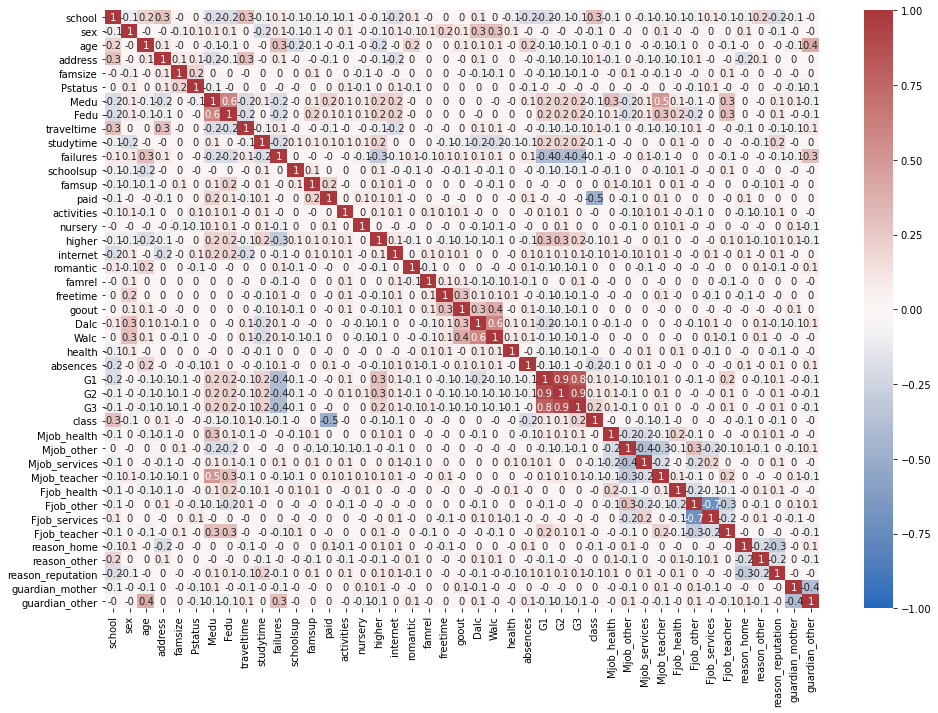

In [53]:
corr_matrix = df.corr().round(1)

# Resizing the heatmap
fig, ax = plt.subplots(figsize=(16,11))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=ax)
plt.show()

In [54]:
print(df.corr()["G3"].sort_values(ascending = False, key=abs))

G3                   1.000000
G2                   0.910743
G1                   0.809142
failures            -0.383145
higher               0.236578
Medu                 0.201472
class                0.187166
studytime            0.161629
Fedu                 0.159796
Dalc                -0.129642
school              -0.127114
age                 -0.125282
reason_reputation    0.121303
address             -0.117696
Walc                -0.115740
internet             0.107064
traveltime          -0.102627
Fjob_teacher         0.101361
Mjob_health          0.101349
romantic            -0.098363
goout               -0.097877
guardian_other      -0.088445
Mjob_teacher         0.084521
health              -0.080079
schoolsup           -0.079346
Mjob_other          -0.066051
freetime            -0.064890
famsize             -0.061209
famrel               0.054461
paid                -0.049388
absences            -0.045671
Mjob_services        0.045015
reason_other        -0.043097
Fjob_healt

# Attribute Selection

In [76]:
# 3 feature reduced data sets, with increasing the number of features based on their correlation
df1 = df[["failures","higher","G3"]]
df2 = df[["failures", "higher", "Medu", "class", "studytime","G3"]]
df3 = df[["failures","higher","studytime","Medu","Fedu","Dalc","age","reason_reputation","school","address","internet","G3"]] # Walc not included because it correlated with Dalc but Dalc correlates better with G3. class removed becuase its biased by class difficulty and doesnt say as much about the student. Maybe not useful to use parentJob over parentEdu due to overfitting.

# PCA

In [79]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
df_copy = df.copy()
y = df_copy.pop("G3")
df4 = pca.fit_transform(df_copy)
df4.shape

(1044, 16)

# Modelling and Testing

In [80]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features = df.iloc[:,0:-1]
target = df.iloc[:,-1]
(x_train, x_test, y_train, y_test) = train_test_split(features, target, test_size=0.25)
model = LinearRegression()
model.fit(x_train, y_train)
print("Model Baseline score:")
display(model.score(x_test, y_test))

features = df1.iloc[:,0:-1]
target = df1.iloc[:,-1]
(x_train, x_test, y_train, y_test) = train_test_split(features, target, test_size=0.25)
model = LinearRegression()
model.fit(x_train, y_train)
print("Model 1 score:")
display(model.score(x_test, y_test))

features = df2.iloc[:,0:-1]
target = df2.iloc[:,-1]
(x_train, x_test, y_train, y_test) = train_test_split(features, target, test_size=0.25)
model = LinearRegression()
model.fit(x_train, y_train)
print("Model 2 score:")
display(model.score(x_test, y_test))

features = df3.iloc[:,0:-1]
target = df3.iloc[:,-1]
(x_train, x_test, y_train, y_test) = train_test_split(features, target, test_size=0.25)
model = LinearRegression()
model.fit(x_train, y_train)
print("Model 3 score:")
display(model.score(x_test, y_test))

features = df4
target = y
(x_train, x_test, y_train, y_test) = train_test_split(features, target, test_size=0.25)
model = LinearRegression()
model.fit(x_train, y_train)
print("Model 4 score:")
display(model.score(x_test, y_test))

Model Baseline score:


0.17664541681603585

Model 1 score:


0.1722486952758917

Model 2 score:


0.15424668729722468

Model 3 score:


0.22123941212126919

Model 4 score:


0.8305638959786443

# Saving/loading data

In [90]:
df1.to_csv("Data/data1.csv", index=False)
df2.to_csv("Data/data2.csv", index=False)
df3.to_csv("Data/data3.csv", index=False)
df4 = pd.DataFrame(df4)
df4.to_csv("Data/data4.csv", index=False)

In [92]:
df1 = pd.read_csv("Data/data1.csv")
df2 = pd.read_csv("Data/data2.csv")
df3 = pd.read_csv("Data/data3.csv")
df4 = pd.read_csv("Data/data4.csv")

In [93]:
df4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.562554,7.479052,-1.152049,1.717906,1.925393,0.919887,2.032398,-0.816050,0.687583,0.181150,-0.744809,0.761099,-0.095022,-0.104018,0.211316,-0.367946
1,0.587792,8.760138,-2.223886,-0.626082,-0.271729,-0.066183,0.054262,-1.174054,0.402412,-0.787364,0.410960,-0.786179,-0.321434,-0.334102,0.464031,0.030799
2,6.151813,4.703582,-1.047682,-0.760499,-0.372657,-2.450223,-0.810171,0.012821,-0.563292,-0.254855,1.016473,-1.057994,-0.211123,0.349679,-0.638547,1.967952
3,-3.085565,-4.478460,-1.293012,2.090580,-1.213314,-0.222162,-0.720349,1.206977,0.854776,0.761882,0.860954,-0.551176,0.605432,1.291249,-0.116639,0.137925
4,0.067468,4.247911,-0.871395,1.848805,-0.620125,-2.355471,2.279121,-0.769659,0.097957,0.226722,0.398693,-0.238430,-0.130067,-1.127772,0.357240,0.448771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,-0.308566,1.109351,-0.109802,-0.087650,-1.679699,1.335502,2.239724,-0.649881,-0.739736,-0.278159,0.935809,0.220152,-0.738020,-0.734330,-0.711777,-0.190506
1040,-1.101297,-5.233428,-1.127612,-2.305115,1.477523,1.312000,0.076492,-0.565971,0.329146,0.026619,-0.383671,-0.702247,0.469983,1.400060,0.027957,-0.938813
1041,1.446457,-0.457446,-2.417590,-1.467926,-2.826765,-0.901790,1.385865,2.418175,0.562020,2.061835,-0.676466,0.396288,0.286537,-0.242996,0.202924,-0.576033
1042,1.899501,1.759666,2.180767,-1.951198,1.900989,-0.627809,-0.813762,0.538660,-0.236837,1.316115,-0.499075,-0.209810,0.702227,1.556450,-0.020711,-0.982917
